# Notebook : Image Transformations

In [1]:
%%HTML
<script src="require.js"></script>

# Sommaire <a class="anchor" id="TOC"></a>
* [I)   Importations](#chapter1)
* [II)  Opération](#chapter2)
 *  $\;$ [A)  Image To Excel Color](#chapter2A)
 *  $\;$ [B)  Transparence To Point](#chapter2B)
 *  $\;$ [C)  Check Existing Color](#chapter2C)
 *  $\;$ [D)  Concatenate Multiple images](#chapter2D)
 *  $\;$ [E)  Combat Pokemon Droite Gauche](#chapter2E)
 
* [III) Export](#chapter3)
* [IV)  XXX](#chapter4)
* [Fin](#END)

# I) Importations<a class="anchor" id="chapter1"></a>
* [Sommaire](#TOC)
## 1) Librairies

In [2]:
# A) Importations Librairies
## a) PATH
import sys
import os
## b) IMAGE
import pandas as pd
import scipy  as sc#Deprecated
import imageio
import numpy  as np  # USED
import PIL    as PIL # USED
import matplotlib       as mpl
import matplotlib.image as mpimg
## c) EXCEL
import openpyxl as openpyxl
## d) OTHERS
from tqdm.notebook import tqdm
all_libs = {
    "pandas"     : pd,
    "numpy"      : np,
    "matplotlib" : mpl,
    "PIL"        : PIL,
    "scipy"      : sc,
    "openpyxl"   : openpyxl,
}
for nom,lib in all_libs.items():
    print(f"{nom:-<16} : {lib.__version__}")
    
# B) Importations Fonction
from PIL import Image
from scipy import misc
from openpyxl import Workbook, load_workbook
from openpyxl.utils import get_column_letter
from openpyxl.styles import PatternFill
from openpyxl.styles.colors import Color

pandas---------- : 1.4.2
numpy----------- : 1.21.5
matplotlib------ : 3.5.1
PIL------------- : 9.0.1
scipy----------- : 1.9.2
openpyxl-------- : 3.0.9


## 2) Paramètres
* [Sommaire](#TOC)
### A) PATH 

In [8]:
THIS_FOLDER = os.path.abspath('.')
FOLDER_IMAGE = "/Image/Map/Asset/Routes/"
NAME_IMAGE = "route01"
FORMAT_IMAGE = ".png"
PATH_IMAGE = os.path.abspath(THIS_FOLDER + FOLDER_IMAGE + NAME_IMAGE + FORMAT_IMAGE)
print(f"Path Image : {PATH_IMAGE}")

FOLDER_EXCEL = "/ResultsTransformation/"
NAME_EXCEL = NAME_IMAGE
FORMAT_EXCEL = ".xlsx"
PATH_EXCEL = os.path.abspath (THIS_FOLDER + FOLDER_EXCEL + NAME_EXCEL + FORMAT_EXCEL)
print(f"Path Excel : {PATH_EXCEL}")

Path Image : C:\Users\bapti\OneDrive\Bureau\Game\ExcelMon\Image\Map\Asset\Routes\route01.png
Path Excel : C:\Users\bapti\OneDrive\Bureau\Game\ExcelMon\ResultsTransformation\route01.xlsx


### B) IMAGE

In [9]:
def GetInfoImage(image):
    return f"Format : {image.format} | Shape : {image.size} | Mode : {image.mode}"# Hauteur x Largeur x Pixel

# A)
def from_image_to_excel(im_np,NAME_IMAGE = NAME_IMAGE):
    if  isinstance(im_np,PIL.Image.Image):
        im_np =  np.asarray(im_np, dtype=np.float32)
    wb = Workbook()
    ws = wb.active
    ws.title = NAME_IMAGE
    for hauteur in tqdm(range(im_np.shape[0])):     # hauteur => row => y
        for largeur in range(im_np.shape[1]): # largeur => col => x
            r,g,b = im_np[hauteur,largeur,0] , im_np[hauteur,largeur,1] , im_np[hauteur,largeur,2]
            if im.mode == "RGBA":
                a = im_np[hauteur,largeur,3]
            else:
                a = 255
            #aRGB_hex = aRGB2hex(r,g,b,a)
            aRGB_hex = RGB2hex(r,g,b)
            if a != 0:
                ws.cell(row = 1 + hauteur, column = 1 + largeur).fill = PatternFill(fgColor = Color(rgb = aRGB_hex),fill_type="solid")
    return wb

# B)
def check_existing_color(im_np,pixel):
    list_rgba_color=[]
    list_rgb_color=[]
    for hauteur in tqdm(range(im_np.shape[0])):     # hauteur => row => y
        for largeur in range(im_np.shape[1]): # largeur => col => x
            
            if im.mode == "RGBA":
                r,g,b,a = tuple([im_np[hauteur,largeur,i] for i in range(4)]) 
            else:
                r,g,b = tuple([im_np[hauteur,largeur] for i in range(3)]) 
                a = 255
            list_rgba_color.append(f"{r}_{g}_{b}_{a}")  
            list_rgb_color.append(f"{r}_{g}_{b}")
    d = pixel 
    pixel_rgba = f"{d['r']}_{d['g']}_{d['b']}_{d['a']}"
    pixel_rgb = f"{d['r']}_{d['g']}_{d['b']}"
    print(f"{pixel_rgba} not present : {pixel_rgba not in list_rgba_color}")
    print(f"{pixel_rgb} not present : {pixel_rgb not in list_rgb_color}")
    return list_rgba_color,list_rgb_color

def reshapeImage(im,multiplicator):
    image = im.copy()
    reshape_size = tuple([int(hw*multiplicator) for hw in image.size])
    if multiplicator<1:
        image.thumbnail(reshape_size)
    elif multiplicator>1:
        image = image.resize(reshape_size)
    return image
    
def aRGB2hex(r,g,b,a=0):
    return f"{int(a):02x}{int(r):02x}{int(g):02x}{int(b):02x}"
def RGB2hex(r,g,b):
    return f"{int(r):02x}{int(g):02x}{int(b):02x}"

IMAGE ORIGINEL Format : PNG | Shape : (384, 640) | Mode : RGB
IMAGE RESHAPE  Format : None | Shape : (384, 640) | Mode : RGB


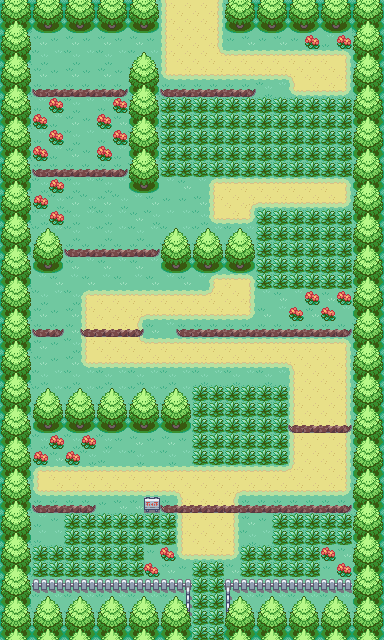

In [10]:
image = Image.open(PATH_IMAGE)
im    = Image.open(PATH_IMAGE)
multiplicator = 1
im =  reshapeImage(im,multiplicator)

im_np = np.asarray(im, dtype=np.float32)

print(f"IMAGE ORIGINEL {GetInfoImage(image)}")# Hauteur x Largeur x Pixel
print(f"IMAGE RESHAPE  {GetInfoImage(im)}")# Hauteur x Largeur x Pixel
display(im)

if im.mode == "RGBA":
    (r, g, b, a) = im.split()
    print(f"Image Transparence (Values{np.unique(np.asarray(a))}) : ")
    display(a)
    # PIL.Image.FLIP_LEFT_RIGHT, PIL.Image.FLIP_TOP_BOTTOM, PIL.Image.ROTATE_90, PIL.Image.ROTATE_180, PIL.Image.ROTATE_270 or PIL.Image.TRANSPOSE
    # imt = image.transpose(PIL.Image.FLIP_LEFT_RIGHT)
    # display(imt)
    # im.load()# To directly chane on the image https://en.wikibooks.org/wiki/Python_Imaging_Library/Editing_Pixels

# II) Opérations <a class="anchor" id="chapter2"></a>
* [Sommaire](#TOC)

## A) Image To Excel Color<a class="anchor" id="chapter2A"></a>
* [Sommaire](#TOC)

In [ ]:
wb_im = from_image_to_excel(im_np)
print(PATH_EXCEL)
wb_im.save(PATH_EXCEL)

## B) Transparence To Point<a class="anchor" id="chapter2B"></a>
* [Sommaire](#TOC)

In [ ]:
taille_case = 16

wb = Workbook()
ws = wb.active
ws.title = NAME_IMAGE
for h,hauteur in enumerate(tqdm(np.arange(0,im_np.shape[0],taille_case)),1):     # hauteur => row => y
    for l,largeur in enumerate(np.arange(0,im_np.shape[1],taille_case),1): # largeur => col => x
        r,g,b = im_np[hauteur,largeur,0] , im_np[hauteur,largeur,1] , im_np[hauteur,largeur,2]
        if im.mode == "RGBA":
            a = im_np[hauteur,largeur,3]
        else:
            a = 255
        #aRGB_hex = aRGB2hex(r,g,b,a)
        aRGB_hex = RGB2hex(r,g,b)
        if a != 0:
            ws.cell(row = h, column = l).fill = PatternFill(fgColor = Color(rgb = aRGB_hex),fill_type="solid")
        else:
            ws.cell(row = h, column = l).value = "."

In [ ]:
wb.save(PATH_EXCEL)

## C) Check existing color<a class="anchor" id="chapter2C"></a>
* [Sommaire](#TOC)

In [11]:
pixel={
    "r":255,
    "g":0,
    "b":0,
    "a":255
}

check_existing_color(im_np,pixel)

  0%|          | 0/640 [00:00<?, ?it/s]

255_0_0_255 not present : True
255_0_0 not present : True


In [12]:
pixel={
    "r":0,
    "g":255,
    "b":0,
    "a":255
}

check_existing_color(im_np,pixel)

  0%|          | 0/640 [00:00<?, ?it/s]

0_255_0_255 not present : True
0_255_0 not present : True


In [13]:
pixel={
    "r":0,
    "g":0,
    "b":255,
    "a":255
}

check_existing_color(im_np,pixel)

  0%|          | 0/640 [00:00<?, ?it/s]

0_0_255_255 not present : True
0_0_255 not present : True


## D) Concatenate Multiple images<a class="anchor" id="chapter2D"></a>
* [Sommaire](#TOC)
imt = image.transpose(PIL.Image.FLIP_LEFT_RIGHT)


In [10]:
def get_concat_h_blank(im1, im2, color=(0, 0, 0),mode_im='RGBA'):
    dst = Image.new(mode_im, (im1.width + im2.width, max(im1.height, im2.height)), color)
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst
def get_concat_h(im1, im2,mode_im='RGBA'):
    dst = Image.new(mode_im, (im1.width + im2.width, max(im1.height, im2.height)))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst
def get_concat_v(im1, im2,mode_im='RGBA'):
    dst = Image.new(mode_im, (max(im1.width, im2.width), im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst
def concatenate_image(PATH_LIST_IMAGE,**kwargs):
    for i,PATH_IMAGE in enumerate(tqdm(PATH_LIST_IMAGE)):
        if i == 0:
            image_concat = Image.open(PATH_IMAGE)
            continue
        image_adding =  Image.open(PATH_IMAGE)
        image_concat = get_concat_h(image_concat,image_adding,**kwargs)
    return image_concat

def concatenate_image_resize(PATH_LIST_IMAGE,multiplicator=1,**kwargs):
    for i,PATH_IMAGE in enumerate(tqdm(PATH_LIST_IMAGE)):
        if i == 0:
            image_concat = reshapeImage(Image.open(PATH_IMAGE),multiplicator)
        else:
            image_adding =  reshapeImage(Image.open(PATH_IMAGE),multiplicator)
            image_concat = get_concat_h(image_concat,image_adding,**kwargs)
    return image_concat


In [127]:
multiplicator = 10
NB_SPRITE_TOT  = 650
NB_SPRITE_USED = 100
NB_PIXEL       = 96
MAX_COL_BLOC   = 18278
MAX_COL_BLOC   = 96*100
NB_SPRITE_BLOC = int(MAX_COL_BLOC/NB_PIXEL)
c = int(NB_SPRITE_TOT/NB_SPRITE_BLOC)

FOLDER_IMAGE = "/Image/black_white/"

FOLDER_IMAGE_SAVE = "/Image/Pokedex_Resize/"# if multiplicator !=1 else "/Image/Pokedex/"
FOLDER_EXCEL_SAVE = "/ResultsTransformation/Pokedex_Resize"# if multiplicator !=1 else "/ResultsTransformation/Pokedex"

NAME_IMAGE = "Pokedex"
FORMAT_IMAGE = ".png"

NAME_EXCEL = "Pokedex"

LIST_NAME_IMAGE = [os.path.abspath(THIS_FOLDER + FOLDER_IMAGE + str(i) + FORMAT_IMAGE) for i in range(NB_SPRITE_USED)] 

In [128]:
# I. Saving as image


PATH_IM_SAVE = os.path.abspath(THIS_FOLDER + FOLDER_IMAGE_SAVE + NAME_IMAGE + '_' + str(multiplicator) + FORMAT_IMAGE)
print(f"Path Image : {(PATH_IM_SAVE)}")
image_concat = concatenate_image_resize(LIST_NAME_IMAGE,1,**{"mode_im":"RGBA"})

print(f"BEFORE * {multiplicator} : {GetInfoImage(image_concat)}")
image_concat_reshape =  reshapeImage(image_concat,multiplicator)
print(f"AFTER  * {multiplicator} : {GetInfoImage(image_concat_reshape)}")
image_concat_reshape.save(PATH_IM_SAVE)
print("SAVED")

Path Image : C:\Users\bapti\OneDrive\Bureau\ExcelMon\Image\Pokedex_Resize\Pokedex_10.png


  0%|          | 0/100 [00:00<?, ?it/s]

BEFORE * 10 : Format : None | Shape : (9600, 96) | Mode : RGBA
AFTER  * 10 : Format : None | Shape : (96000, 960) | Mode : RGBA


In [ ]:
# II. Saving by block
eport_mode = \
{
    "Excel" : True,
    "Image" : True
}
# bloc = np.linspace(0,NB_SPRITE_TOT,NB_BLOC+1).astype(int)
bloc = list(np.unique(list(range(0,NB_SPRITE_TOT,100))+[NB_SPRITE_TOT]))
bloc_min = bloc[:-1]
bloc_max = bloc[1:]
for i, (min_b,max_b) in enumerate(zip(bloc_min,bloc_max),1):
    print(f"[{i}/{len(bloc_min)}] Sprites for {min_b} to {max_b - 1}")
    NAME_EXCEL_BLOC = f"{NAME_EXCEL}_{min_b}_{max_b - 1}"
    NAME_IMAGE_BLOC = f"{NAME_IMAGE}_{min_b}_{max_b - 1}"
    PATH_EXCEL   = os.path.abspath(THIS_FOLDER + FOLDER_EXCEL_SAVE      + NAME_EXCEL_BLOC + FORMAT_EXCEL)
    PATH_IM_SAVE = os.path.abspath(THIS_FOLDER + FOLDER_IMAGE_SAVE + NAME_IMAGE_BLOC + FORMAT_IMAGE)
    print(f"Path Excel : {(PATH_EXCEL)}")
    
    LIST_NAME_IMAGE = [os.path.abspath(THIS_FOLDER + FOLDER_IMAGE + str(i) + FORMAT_IMAGE) for i in range(min_b,max_b)] 
    
    image_concat = concatenate_image(LIST_NAME_IMAGE)
    print(f"Dimension : {image_concat.size}")
    if eport_mode['Image']:
        image_concat.save(PATH_IM_SAVE)
    if eport_mode['Excel']:
        wb_conc = from_image_to_excel(image_concat,NAME_EXCEL_BLOC)
        wb_conc.save(PATH_EXCEL)

## E) Combat Pokemon Droite Gauche<a class="anchor" id="chapter2E"></a>
* [Sommaire](#TOC)

In [17]:
NB_SPRITE_TOT  = 650
reorienting    = ["11","67","76","210","494","552","574","630"]
reorienting    = ["11","67","76","210","494","552","574","630"]
FOLDER_IMAGE_ORIGIN = "/Image/black_white/"
FOLDER_IMAGE_SAVE   = "/Image/Pokedex/"

for position in ["Droite","Gauche"]:
    print(f"Executing {position}")
    for pokeIndex in tqdm(range(NB_SPRITE_TOT)):
        pokeIndex = str(pokeIndex)
        im = Image.open(THIS_FOLDER + FOLDER_IMAGE_ORIGIN + pokeIndex + ".png")
        if (position == "Gauche" and pokeIndex in reorienting) or (position == "Droite" and pokeIndex not in reorienting):
            im = im.transpose(PIL.Image.FLIP_LEFT_RIGHT)
        im.save(THIS_FOLDER + FOLDER_IMAGE_SAVE + f"{position}/{pokeIndex}" + ".png")

Executing Droite


  0%|          | 0/650 [00:00<?, ?it/s]

Executing Gauche


  0%|          | 0/650 [00:00<?, ?it/s]

# IV) XXX <a class="anchor" id="chapter4"></a>


# END <a class="anchor" id="END"></a>
* [Sommaire](#TOC)